# Multi-layer Perceptron (MLP)

In [3]:
!jupyter nbconvert --to selectLanguage --NotebookLangExporter.language=en  MLP.ipynb

[NbConvertApp] Converting notebook MLP.ipynb to selectLanguage
[NbConvertApp] Writing 41996 bytes to MLP_en.ipynb


This article is referenced from the source: [machinelearningcoban](https://machinelearningcoban.com/2017/02/24/mlp/)

Note, before researching this algorithm, please research the following two basic topics:

- [PLA algorithm](PLA.ipynb)
- [Neural network](..\model\NN.ipynb)

This is a more upgraded version of the PLA algorithm when the input data of the problem is more complex than usual

## Question

If you have studied [PLA algorithm](PLA.ipynb) carefully, you know that this algorithm can solve very simple binary classification problems such as representing logical functions NOT, AND, OR with the input being 0 or 1 (The output is different, if it is 0 then we replace it with -1).

<img src="https://machinelearningcoban.com/assets/14_mlp/logic_nn.png" style="heigh:600px; width:600px; position:relative; margin-top:50px; left: 180px; margin-bottom:50px">

Bài viết này được kham khảo từ nguồn: [machinelearningcoban](https://machinelearningcoban.com/2017/02/24/mlp/)

Lưu ý, trước khi đi nghiên cứu vào thuật toán này, bạn hãy nghiên cứu trước 2 chủ đề cơ bản sau:

- [thuật toán PLA](PLA.ipynb)
- [Mạng neuron network](..\model\NN.ipynb)


This is a more upgraded version of the PLA algorithm when the input data of the problem is more complex than usual

## Đặt vấn đề

Nếu nghiên cứu kỹ [thuật toán PLA](PLA.ipynb) rồi, bạn biết rằng thuật toán này có thể giải quyết các bài toán phân loại binary vô cùng đơn giản chẳng hạn như biểu diễn các hàm số logic NOT, AND, OR với đầu vào là 0 hoặc 1 (Riêng đầu ra thì khác, nếu nó bằng 0 thì ta thay bằng -1) .

<img src="https://machinelearningcoban.com/assets/14_mlp/logic_nn.png" style="heigh:600px; width:600px; position:relative; margin-top:50px; left: 180px; margin-bottom:50px">


Nhận thấy rằng với các bài toán OR, AND, và OR, dữ liệu có vẻ linearly separable, vì vậy ta có thể tìm được nghiệm $w$ giúp biểu diễn chính xác mỗi hàm số a.


Tuy nhiên với hàm XOR thì khác, giá trị output của nó bằng 1 nếu và chỉ nếu hai input khác nhau. Từ đó, ta thấy dữ liệu có vẻ không linearly separable, tức không thể tìm được 1 đường thằng giúp phân chia hai lớp xanh đỏ, nên bài toán vô nghiệm.

Nếu thay PLA bằng Logistic Regression, tức thay hàm activation function từ sgn sang sigmoid, ta cũng không tìm được các hệ số thỏa mãn, vì về bản chất, Logistic Regression cũng chỉ tạo ra các đường biên có dạng tuyến tính. Như vậy là các mô hình Neural Network chúng ta đã biết không thể biểu diễn được hàm số logic đơn giản này.

Vậy thì phải làm sao ? 

## Giải pháp khả thi

Đó là sử dụng hai đường thẳng để phân vùng lãnh thổ

<img src="https://machinelearningcoban.com/assets/14_mlp/xor_nn.png" style="heigh:600px; width:600px; position:relative; margin-top:50px; left: 180px; margin-bottom:50px">

Việc sử dụng 2 đường thẳng để phân vùng khá hiệu quả nhưng đòi hỏi ta phải làm việc với 2 phương trình thay vì 1 như trước đây. Điều này cũng có nghĩa là ta phải tìm 2 nghiệm $w^{(1)}$ và $w^{(2)}$ ứng với từng phương trình $a^{(1)}$ và $a^{(2)}$. Chú ý, từ giờ tôi sẽ gọi $a^{(1)}$ và $a^{(2)}$ là các node.

Tạm thời gác qua chuyện đi tìm 2 nghiệm đó, chúng ta thử xem xét hình trên, ta có:

- $a^{(1)}_1: \quad -2x_1-2x_2 + 3 = 0$
- $a^{(1)}_2: \quad 2x_1 + 2x_2 - 1 = 0$

Bạn thấy 2 đường này quen thuộc chứ ? Đây chính là 2 đường thẳng song song với điều kiện $\frac{-2}{2} = \frac{-2}{2} \neq \frac{3}{-1}$. Tất nhiên là không phải lúc nào cũng có 2 đường song song này vì bây giờ ta chỉ đang bàn về giải pháp cho hàm XOR

Từ đồ hình vẽ bên phải, ta thấy input $x_1$, $x_2$ là các node được sắp xếp tạo thành một lớp (layer). Hãy nhớ rằng layer này luôn đi kèm một node bias $x_0 = 1$ giống như tôi đã đề cập trong linear regression

Các nghiệm của 2 phương trình đã được cho trước và không phải đi tìm. Chúng còn được gọi là trọng số của mô hình. 

Các trọng số này lần lượt là $w^{(1)}_1 = (-2,-2) \quad$, $ \quad w^{(1)}_2 = (2,2)$. Và tương tự như các node trên, chúng cũng có trọng số bias đi kèm là $w^{(1)}_0 = (3,-1)$. 


Cả 2 phương trình đều có dạng tổng quát là: $$ w_1x_1 + w_2x_2 + w_0x_0 \quad (1)$$

*Ghi chú: bạn đọc có thể hơi rối não về cái khái niệm bias này nhưng hãy chịu khó tìm hiểu trước [Linear regression](LR.ipynb) để biết vai trò của nó nhé. Và nếu đã hiểu rồi thì hãy đọc thêm [Neuron network](NN.ipynb) để biết rằng bias ở phần này có gì khác so với bias trong chương [Linear regression](LR.ipynb)*

**Tính chất**
- Có bao nhiêu layer thì có bấy nhiêu node bias
- Có bao nhiêu phương trình thì có bấy nhiêu trọng số bias

Mặt khác, vì hàm XOR chỉ có một đầu ra nên ta cần làm thêm một bước nữa: coi $a^{(1)}_1$,$a^{(1)}_2$ như là input layer của một một PLA khác (Và đừng quên layer này còn có node bias $a^{(1)}_0 = 1$ ). 

Trong PLA mới này, các trọng số được thể hiện như trên hình là $(1,1,-1)$. Ta gọi hàm tuyến của PLA này là $z^{(2)}$  và nó vẫn tuân theo dạng tổng quát $(1)$. Khi đó:

$$ z^{(2)} : a^{(1)}_1 +  a^{(1)}_2 - 1 = 0$$
 
Áp dụng quy tắc phân loại của PLA, chúng ta sử dụng hàm sign để ánh xạ $z^{(2)}$ đến một nhãn nào đó mà ta gọi là $a^{(2)}$ (giá trị có thể là 1 hoặc -1). Với các điểm hình vuông xanh, ta có $a^{(1)}_1=a^{(1)}_2=1$. Khi đó: 

$$ a^{(2)} = sign(z^{(2)})=sign(1×1 +1×1 + (−1)×1)=1.$$ 

Với các điểm hình tròn đỏ, ta có $a^{(1)}_1=−a^{(1)}_2$, vậy nên $$a^{(2)} = sign(z^{(2)})=sign(-a^{(1)}_2+a^{(1)}_2−1)=sign(−1)=−1$$


Trong cả hai trường hợp, ouput mà chúng ta dự đoán đều giống với giá trị thực tế ground truth. Vậy, nếu ta sử dụng 3 PLA tương ứng với các output $a^{(1)}_1,a^{(1)}_2,a^{(2)}$, ta sẽ biểu diễn được hàm XOR.

Ba PLA kể trên được xếp vào hai layers. 
- Layer thứ nhất: input - lục, output - lam. 
- Layer thứ hai: input - lam, output - đỏ.

Ở đây, output của layer thứ nhất chính là input của layer thứ hai. Các Layer có tính chất trung gian như vậy còn được gọi là hidden layer. Tổng hợp lại ta được một mô hình mà ngoài layer input (lục) và output (đỏ), ta còn có một layer nữa (lam). 

Đây chính là mô hình Multi-layer Perceptron (MLP). Mô hình này xuất phát từ thuật toán cùng tên. Sau đây, tôi xin nói thêm về thuật toán này.

### Các ký hiệu và khái niệm

Để thuận tiện cho việc nghiên cứu sâu hơn, ta hãy thống nhất một vài khái niệm và quy ước ký hiệu toán học.

####  Layers


Ngoài Input layers và Output layers, một Multi-layer Perceptron (MLP) có thể có nhiều Hidden layers ở giữa. Các Hidden layers theo thứ tự từ input layer đến output layer được đánh số thứ thự là Hidden layer 1, Hidden layer 2, … Hình 3 dưới đây là một ví dụ với 2 Hidden layers.


<img src="https://machinelearningcoban.com/assets/14_mlp/multi_layers.png" style="heigh:450px; width:450px; position:relative; margin-top:50px; left: 180px; margin-bottom:50px">

Số lượng layer trong một MLP được tính bằng số hidden layers cộng với 1. Tức là khi đếm số layers của một MLP, ta không tính input layers. Số lượng layer trong một MLP thường được ký hiệu là $L$. Trong Hình 3 trên đây, $L=3$.

#### ký hiệu

Chỉ số trên đại diện cho thứ tự layer mà một node thuộc về

Chỉ số dưới chân đại diện cho thứ tự của node

VD: 

- node $a^{(2)}_1$ có nghĩa là node thứ 1 thuộc layer 2

- node $a^{(2)}_2$ có nghĩa là node thứ 2 thuộc layer 2


Có một vài ký hiệu nhìn thoáng qua thì rất "giống" đại số tuyến tính nhưng không phải vậy vì chúng ta đang xét ngữ cảnh mạng nơ-ron nhân tạo.

Ví dụ

- $R^{d^{(l−1)}×d^{(l)}}$ có nghĩa là không gian $R$ tạo bởi 2 layer gộp lại, trong đó layer thứ $(l−1)$ và layer thứ $l$ có cùng độ dài là d. Ở đây, ta không nên hiểu là không gian $R$ có d hàng và d cột nhé vì số lượng "hàng" trong các layer có thể khác nhau, đồng thời ở đây cũng chỉ có 2 cột mà thôi.



#### Weights và Biases

Có L ma trận trọng số cho một MLP có L layers. Các ma trận này được ký hiệu là 

$$W^{(l)}∈R^{d^{(l−1)}×d^{(l)}},l=1,2,…,L $$

trong đó $W^{(l)}$ thể hiện các kết nối từ layer thứ $l−1$ tới layer thứ $l$ (ta coi input layer là layer thứ 0). Cụ thể hơn, phần tử $w^{(l)}_{ij}$ thể hiện kết nối từ node thứ i của layer thứ $(l−1)$ tới node từ j của layer thứ $(l)$. Các biases của layer thứ $(l)$ được ký hiệu là $b(l)∈Rd(l)$. Các trọng số này được ký hiệu như trên Hình 4. Khi tối ưu một MLP cho một công việc nào đó, chúng ta cần đi tìm các weghts và biases này.Tập hợp các weights và biases lần lượt được ký hiệu là W và b
.

####  Activation functions

Phần này chủ yếu nhắc lại khái niệm "activation" đã được đề cập ở [PLA cơ bản](/PLA.ipynb). Khái niệm này rất phổ biến trong lĩnh vực neuron network nói riêng và thuật toán machine learning nói chung.

Có thể bạn không để ý nhưng chúng ta đã sử dụng các activation trong chương PLA và Logistic regression rồi, ví dụ như sign (nếu áp dụng PLA), sigmoid  hoặc tanh function (nếu áp dụng logistic regression),..

Đọc thêm: [Tại sao phải có activation function](https://viblo.asia/p/mot-so-ham-kich-hoat-trong-cac-mo-hinh-deep-learning-tai-sao-chung-lai-quan-trong-den-vay-part-1-ham-sigmoid-bWrZn4Rv5xw)

## Thuật toán MLP

1. Khởi tạo trọng số ngẫu nhiên:
    - Trọng số W1, b1 cho lớp ẩn (hidden layer)
    - Trọng số W2, b2 cho lớp đầu ra (output layer)
2. Lan truyền xuôi (Forward Propagation): Với mỗi input X, thuật toán thực hiện các bước sau:
    - Tính giá trị đầu ra của lớp ẩn: Z1 = X * W1 + b1 và A1 = sigmoid(Z1)
    - Tính giá trị đầu ra của lớp đầu ra: Z2 = A1 * W2 + b2 và A2 = sigmoid(Z2)
3. Tính sai số (Error Computation): Tính sai số giữa đầu ra dự đoán A2 và nhãn thực tế y.
4. Lan truyền ngược (Backpropagation): Từ sai số ở lớp đầu ra, thuật toán tính gradient (đạo hàm) của hàm mất mát theo các trọng số:
    - Tính gradient đối với W2 và b2: dW2 = A1.T * dZ2, db2 = sum(dZ2)
    - Tính gradient đối với W1 và b1: dZ1 = dZ2 * W2.T * sigmoid_derivative(A1), dW1 = X.T * dZ1, db1 = sum(dZ1)
5. Cập nhật trọng số (Weight Update): Sử dụng gradient descent để cập nhật trọng số:
    - W1 = W1   - learning_rate * dW1
    - b1 = b1   - learning_rate * db1
    - W2 = W2   - learning_rate * dW2
    - b2 = b2   - learning_rate * db2
6. Lặp lại: Lặp lại các bước từ 2 đến 5 cho nhiều lần lặp (epochs) với toàn bộ dữ liệu huấn luyện.
7. Dự đoán (Prediction): Sau khi huấn luyện, sử dụng trọng số đã được học để dự đoán nhãn cho dữ liệu mới bằng cách thực hiện lan truyền xuôi và lấy đầu ra ở lớp cuối cùng.

In [15]:

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

print(sigmoid(-1))

0.2689414213699951


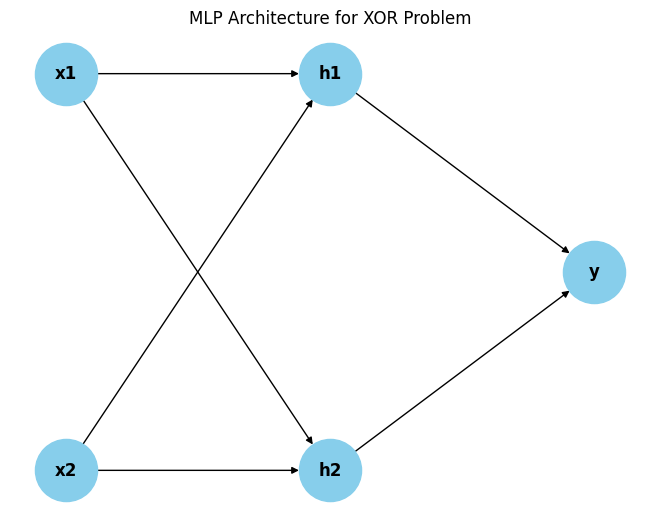

In [7]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_mlp():
    G = nx.DiGraph()

    # Adding nodes
    G.add_node('x1', layer=0)
    G.add_node('x2', layer=0)
    G.add_node('h1', layer=1)
    G.add_node('h2', layer=1)
    G.add_node('y', layer=2)

    # Adding edges
    G.add_edges_from([('x1', 'h1'), ('x1', 'h2'), ('x2', 'h1'), ('x2', 'h2')])
    G.add_edges_from([('h1', 'y'), ('h2', 'y')])
    
    # Positioning
    pos = nx.multipartite_layout(G, subset_key="layer")
    
    # Drawing
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_weight='bold', font_size=12)
    plt.title("MLP Architecture for XOR Problem")
    plt.show()

draw_mlp()
